# Project: Investigate a Dataset - [patients noshowappointments-may-2016.csv]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

- ‘ScheduledDay’ tells us on what day the patient set up their appointment.
- ‘Neighborhood’ indicates the location of the hospital.
- ‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
- Be careful about the encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.


### Question(s) for Analysis

Try to understand important factors to predict if a patients will show up thier appointments

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as snb

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
# explore the shape of the data
df.shape

(110527, 14)

### To show the number of rows and columns

In [5]:
# explore the duplicate of data
df.duplicated().sum()

0

### To ensure if there is duplicate or not

In [6]:
df['PatientId'].nunique()

62299

### To show the unique values

In [7]:
df['PatientId'].duplicated().sum()

48228

### To count number the number of duplicated values

In [8]:
df.duplicated(['PatientId','No-show']).sum()

38710

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [10]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [11]:
# remove the wrong data rows
df.query("Age =='-1'")

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [12]:
df.drop(index = 99832,inplace=True)

In [13]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000



### Data Cleaning 

In [14]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
# rename the columns
df.rename(columns={'No-show':'No_show'},inplace=True)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [15]:
# remove duplicated ids with duplicated show status
df.drop_duplicates(['PatientId','No_show'],inplace=True)
df.shape

(71816, 14)

In [16]:
# remove unnessary data
df.drop(['PatientId','AppointmentID','ScheduledDay','AppointmentDay'],axis=1,inplace=True)
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### Remove unnessary data

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71816 entries, 0 to 110524
Data columns (total 10 columns):
Gender           71816 non-null object
Age              71816 non-null int64
Neighbourhood    71816 non-null object
Scholarship      71816 non-null int64
Hipertension     71816 non-null int64
Diabetes         71816 non-null int64
Alcoholism       71816 non-null int64
Handcap          71816 non-null int64
SMS_received     71816 non-null int64
No_show          71816 non-null object
dtypes: int64(7), object(3)
memory usage: 6.0+ MB


### To ensure is there null values or not 

# <a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1 (Replace this header name!)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f71c4891208>,
      dtype=object)

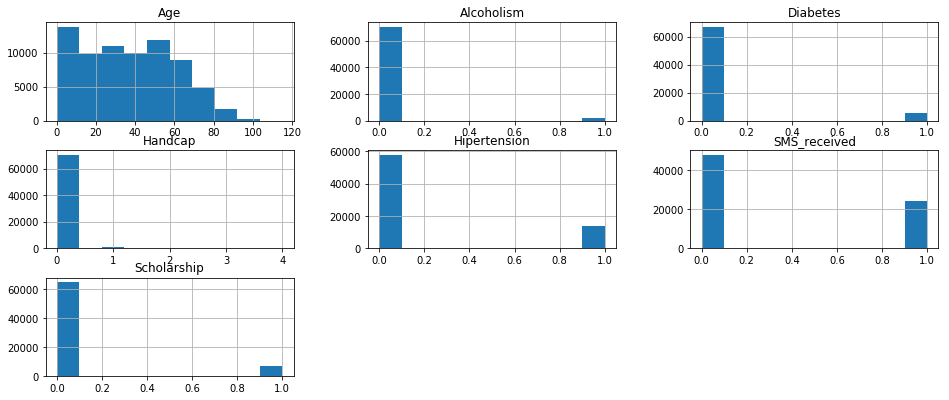

In [18]:
# general look
df.hist(figsize=(16,6.5))

In [19]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
# group data into two groups
show = df.No_show =='No'
no_show = df.No_show =='Yes'
df[show].count(),df[no_show].count()

# number of show patients is greater than no show patients

(Gender           54153
 Age              54153
 Neighbourhood    54153
 Scholarship      54153
 Hipertension     54153
 Diabetes         54153
 Alcoholism       54153
 Handcap          54153
 SMS_received     54153
 No_show          54153
 dtype: int64, Gender           17663
 Age              17663
 Neighbourhood    17663
 Scholarship      17663
 Hipertension     17663
 Diabetes         17663
 Alcoholism       17663
 Handcap          17663
 SMS_received     17663
 No_show          17663
 dtype: int64)

### To compare the number of show patients with No show

In [20]:
df[show].mean(),df[no_show].mean()

(Age             37.229166
 Scholarship      0.091334
 Hipertension     0.202944
 Diabetes         0.072868
 Alcoholism       0.023600
 Handcap          0.020904
 SMS_received     0.297232
 dtype: float64, Age             34.376267
 Scholarship      0.108419
 Hipertension     0.170922
 Diabetes         0.065108
 Alcoholism       0.029440
 Handcap          0.017777
 SMS_received     0.453094
 dtype: float64)

### To show the average of show and No show patients

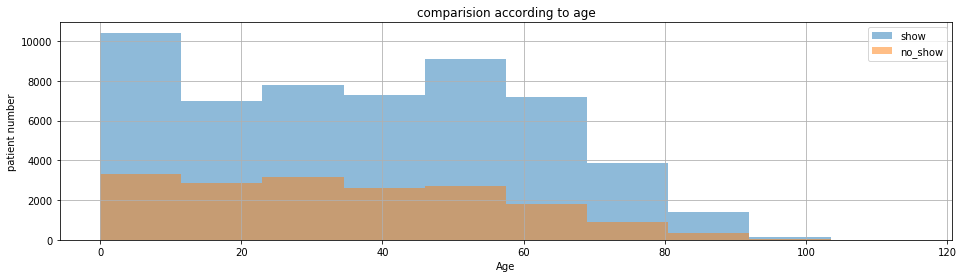

In [21]:
def attendance (df , col_name , attended, absent,title):
    plt.figure(figsize=[16,4])
    df[col_name][attended].hist(alpha=.5,label='show')
    df[col_name][absent].hist(alpha=.5,label='no_show')
    plt.legend()
    plt.xlabel(col_name)
    plt.ylabel('patient number')
    plt.title(title)
attendance(df,'Age',show,no_show,'comparision according to age')

### the first greatest show are ages from 0 to 10 and the second greatest show are from 44 to 56 

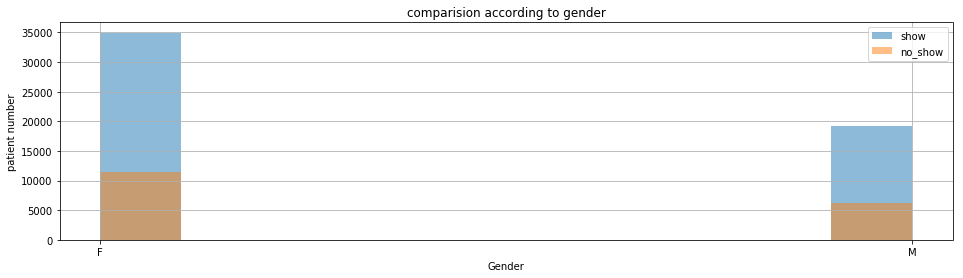

In [22]:
attendance(df,'Gender',show,no_show,'comparision according to gender')

F    34960
M    19193
Name: Gender, dtype: int64

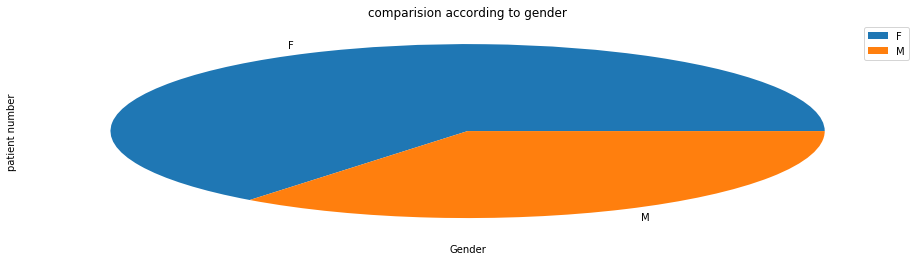

In [23]:
plt.figure(figsize=[16,4])
df['Gender'][show].value_counts().plot(kind='pie',label='show')
plt.legend()
plt.xlabel('Gender')
plt.ylabel('patient number')
plt.title('comparision according to gender')
df.Gender[show].value_counts()

F    11506
M     6157
Name: Gender, dtype: int64

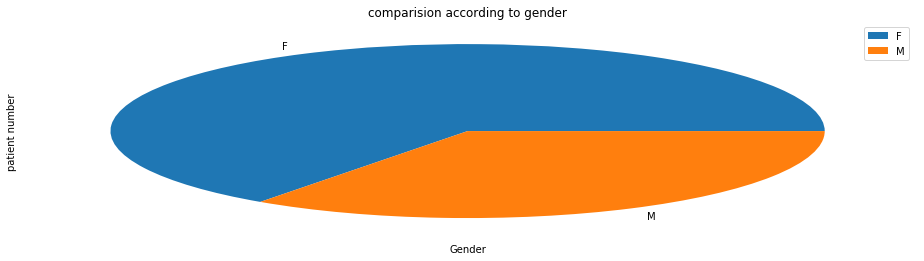

In [24]:
plt.figure(figsize=[16,4])
df['Gender'][no_show].value_counts().plot(kind='pie',label='show')
plt.legend()
plt.xlabel('Gender')
plt.ylabel('patient number')
plt.title('comparision according to gender')
df.Gender[no_show].value_counts()

### we understand that from the above histogram and pie chart that gender doesn't affect on the patient  attendance

0    49207
1     4946
Name: Scholarship, dtype: int64
0    15748
1     1915
Name: Scholarship, dtype: int64


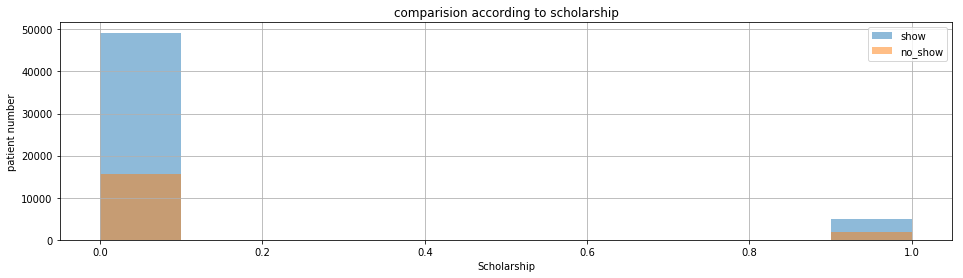

In [25]:
attendance(df,'Scholarship',show,no_show,'comparision according to scholarship')
print(df.Scholarship[show].value_counts())
print(df.Scholarship[no_show].value_counts())

### we noted from the above that scholarship did not affect on attendance

0    38057
1    16096
Name: SMS_received, dtype: int64
0    9660
1    8003
Name: SMS_received, dtype: int64


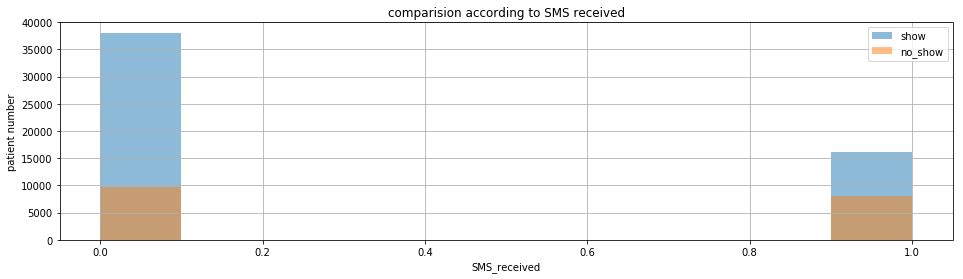

In [26]:
# comparision according to SMS received
attendance(df,'SMS_received',show,no_show,'comparision according to SMS received')
print(df.SMS_received[show].value_counts())
print(df.SMS_received[no_show].value_counts())

### we noted from the above histogram that more patient showed without receiving sms

Text(0.5,1,'comparision between who show and no show according to Neighbourhood')

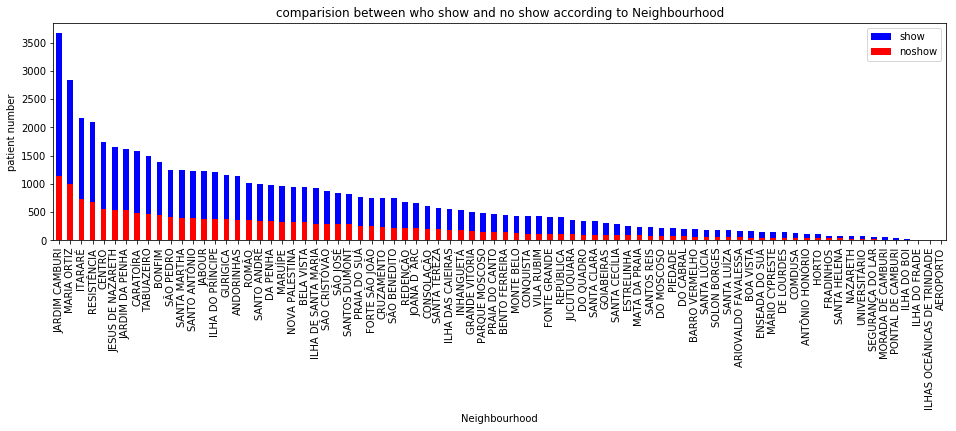

In [27]:
# comparision according to Neighbourhood
plt.figure(figsize=[16,4])
df.Neighbourhood[show].value_counts().plot(kind='bar',color='blue',label='show')
df.Neighbourhood[no_show].value_counts().plot(kind='bar',color = 'red', label='noshow')
plt.legend()
plt.xlabel('Neighbourhood')
plt.ylabel('patient number')
plt.title('comparision between who show and no show according to Neighbourhood')

### Neighbourhood has the largest number of patient and also the largest number of no showing

<a id='conclusions'></a>
## Conclusions

- Neighbourhood has the largest number of patient and also the largest number of no showing

- the number of patients that showing without receiving sms are greater than the number of patients that showing with receiving sms so we must review the sms compaign

- also the age affects on showing patients that age from 0 - 10 age and from 44 - 56


### Limitations


there are no clear correlation between showing and gender , scholarship



In [28]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0